### Here we analyse the magnetic fields that we measured on a grid or a ring

In [1]:


import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import optimize
from timeit import default_timer as timer
import os

freq_to_mag = 1. / (2 * 2.8e6)
V_to_dist = 60 # convert galvo voltages to distances 1 V is about 60um
%matplotlib inline

from b26_toolkit.src.data_analysis import nv_optical_response as nv
from b26_toolkit.src.data_analysis import nv_optical_response_test as nv_test

# first we plot the freq as a function of B-field

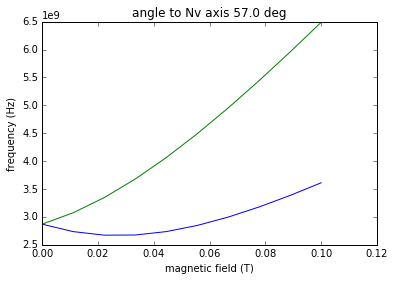

In [2]:
# angle 
theta = 57*np.pi/180
# field strength
B_mag = np.linspace(0,0.1,10)


Bs = np.array([B_mag*np.sin(theta), 0.*B_mag*np.sin(theta), B_mag*np.cos(theta)]).T
f = nv.esr_frequencies(Bs)

plt.plot(B_mag, f[:,0])
plt.plot(B_mag, f[:,1])
plt.xlabel('magnetic field (T)')
plt.ylabel('frequency (Hz)')
plt.title('angle to Nv axis {:0.1f} deg'.format(theta*180/np.pi))

# now let's test if we can reconstruct the fields (single NV get Bz and Bperp)

### define some functions

In [6]:
# def test_magnetic_field(Bmax=1, verbose = True):
#     """
#     here we test how well we can reconstruct the on axis and off axis field from the ESR freq. from a single NV ESR
    
#     Bmax: maximum random field in Teslas
#     """
#     import random
#     Bmax=0.1

#     # get random magnetic field
#     B = random.random()*Bmax
#     # get random angle field
#     theta = random.random()*np.pi/10
#     phi = random.random()*np.pi*0

#     error = calc_error(B, theta, phi, verbose)
#     return error, B, theta, phi
    

In [8]:
B, theta, phi = 0.0004968922105393459, 80.70279878507476, 41.46769792621077

nv_test.calc_error_single(B, theta, phi, verbose = True)

('Bfield (T) / theta (deg) / phi (deg)', 0.0004968922105393459, 80.70279878507476, 41.46769792621077)
('Bxyz', 0.00036744467978515967, 0.00032471846868268342, 8.0275726646554261e-05)
('Bon, Boff', 8.0275726646554261e-05, 0.00049036484030367156)
('Bon_r, Boff_r', 7.9956877062844638e-05, 0)
('error_on (%)', 98.686360925523616)
('error_off (%)', 0.064168762751086739)
('error (%)', 98.686381787726035)


0.98686381787726041

### for random fields calculate the reconstruction error

In [12]:
errs = np.array([nv_test.test_magnetic_field_single_mag(Bmax=0.1, verbose = False) for i in range(5000)])
np.shape(errs)

(5000L, 4L)

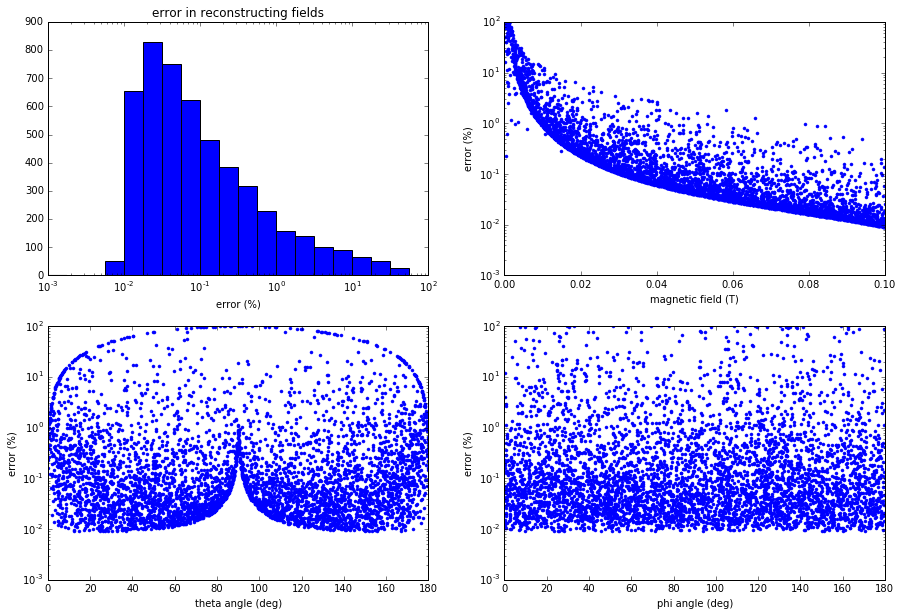

In [13]:

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)

bins=10.**np.arange(-3,2,0.25)
plt.hist(errs[:,0]*100, bins=bins)
plt.gca().set_xscale("log")
plt.title('error in reconstructing fields')
plt.xlabel('error (%)')

plt.subplot(2, 2, 2)


plt.semilogy(errs[:,1], errs[:,0]*100,'.')
plt.xlabel('magnetic field (T)')
plt.ylabel('error (%)')

plt.subplot(2, 2, 3)

plt.semilogy(errs[:,2], errs[:,0]*100,'.')
plt.xlabel('theta angle (deg)')
plt.ylabel('error (%)')

plt.subplot(2, 2, 4)

plt.semilogy(errs[:,3], errs[:,0]*100,'.')
plt.xlabel('phi angle (deg)')
plt.ylabel('error (%)')

In [16]:
# angle 
theta = 57*np.pi/180
# field strength
B_mag = np.linspace(0,0.1,10)


Bs = np.array([B_mag*np.sin(theta), 0.*B_mag*np.sin(theta), B_mag*np.cos(theta)]).T
f = nv.esr_frequencies(Bs)

# B_field_single_ESR(f[0])
B_r = np.array([nv.B_field_from_esr(fn, fp) for fn, fp in f])

theta_r = np.arctan2(B_r[:,1], B_r[:,0])*180/np.pi
B_mag_r = np.sqrt(np.sum(B_r**2,1))
B_mag_r

array([ 0.        ,  0.01103379,  0.02218366,  0.03330764,  0.04442518,
        0.05554014,  0.06665382,  0.07776677,  0.08887926,  0.09999144])

# Now let's check for multiple NV families

In [17]:
def plot_esr_spectra_ensemble(B_mag, theta, phi, ylim = [2,4], ax = None):
    """
    plots the esr spectra for all four families for magnetic fields that are defined in the lab frame
    
    """


    NV_colors = ['r', 'g', 'b', 'k']
    
    if ax is None:
        f, ax = plt.subplots()
    
    for i in range(4):
        # get the off axis and on axis field
        BNV = nv.B_fields_in_NV_frame(nv.B_cart(B_mag, phi, theta), i)
        f = nv.esr_frequencies(BNV)



        ax.plot(B_mag, f[:,0]*1e-9, NV_colors[i], linewidth=2)
        ax.plot(B_mag, f[:,1]*1e-9, NV_colors[i]+'--', linewidth=2)
    ax.set_xlabel('magnetic field strenth')
    ax.set_ylabel('ESR freq (GHz)')
#     ax.set_title('angles in lab frame phi= {:0.1f}, theta = {:0.1f}'.format(phi*180/np.pi,theta*180/np.pi))
    ax.set_title('phi= {:0.1f}, theta = {:0.1f}'.format(phi,theta))
    ax.set_ylim(ylim)
    ax.set_xlim([min(B_mag), max(B_mag)])

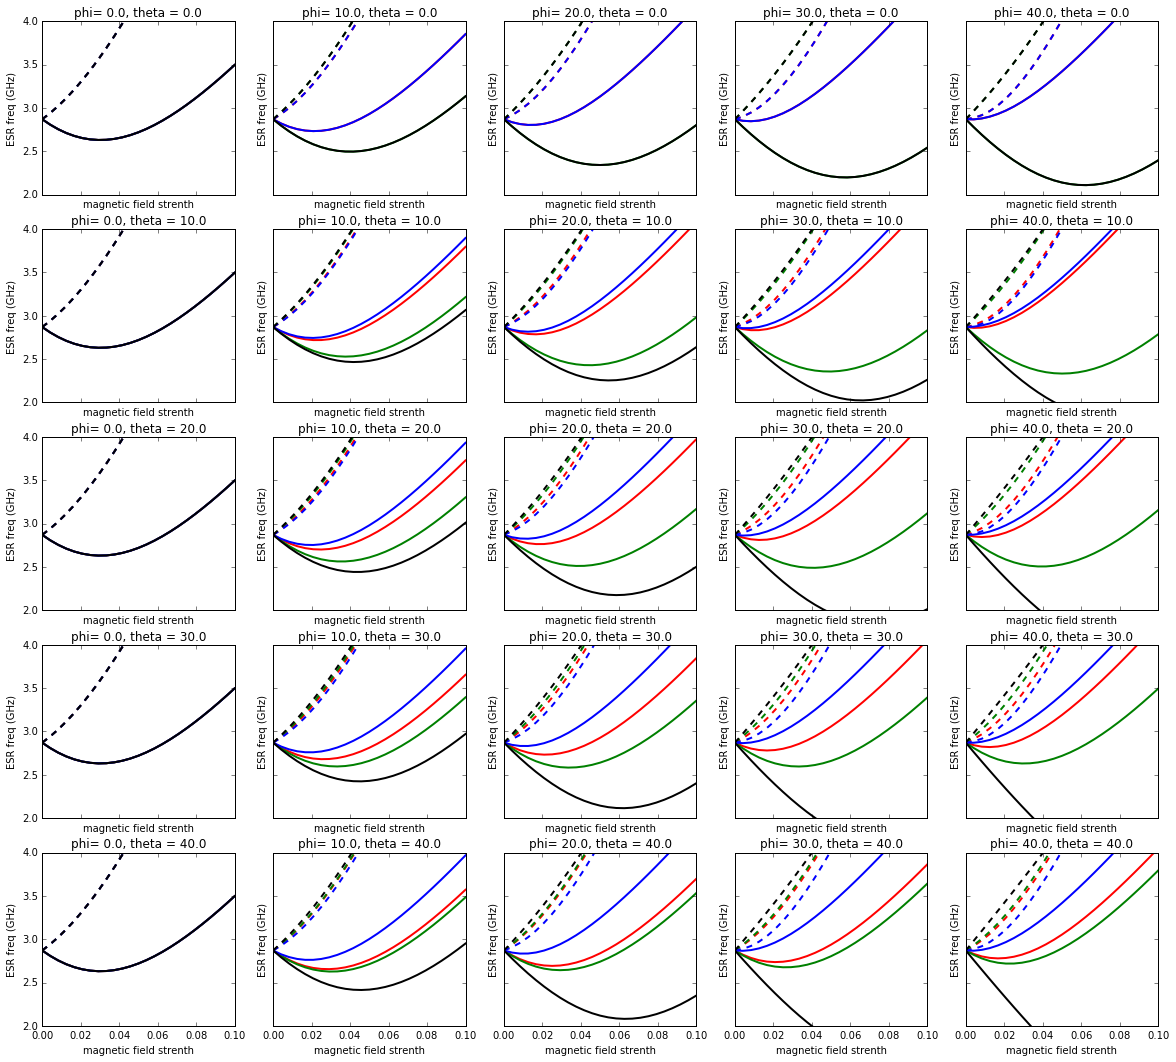

In [18]:
plt.figure()

f, axes = plt.subplots(5,5, figsize=(20, 18), sharex = True, sharey= True)
thetas = [0,10,20,30, 40]
phis = [0,10,20,30, 40]
# field strength
B_mag = np.linspace(0,0.1,25)
for row, theta in zip(axes, thetas):
    for a, phi in zip(row, phis):
        plot_esr_spectra_ensemble(B_mag, theta, phi, ax=a)
        
f.savefig('esr_ensemble.pdf')

(2, 4)

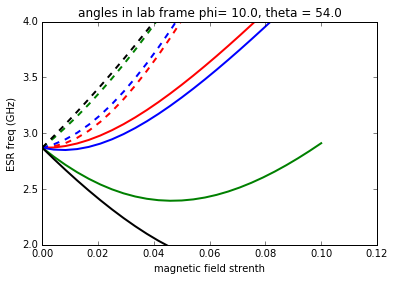

In [19]:
NV_colors = ['r', 'g', 'b', 'k']



# angle 
theta = 54
# phi
phi = 10
# field strength
B_mag = np.linspace(0,0.1,25)

f, ax = plt.subplots()

for i in range(4):
    # get the off axis and on axis field
    BNV = nv.B_fields_in_NV_frame(nv.B_cart(B_mag,theta,  phi), i)
    f = nv.esr_frequencies(BNV)
    plt.plot(B_mag, f[:,0]*1e-9, NV_colors[i], linewidth=2)
    plt.plot(B_mag, f[:,1]*1e-9, NV_colors[i]+'--', linewidth=2)
plt.xlabel('magnetic field strenth')
plt.ylabel('ESR freq (GHz)')
plt.title('angles in lab frame phi= {:0.1f}, theta = {:0.1f}'.format(phi,theta))
plt.ylim([2,4])

## ESR lines can cross 

the esr freq. are typically ordered such that we can identify peaks corresponding to the same family, i.e. the highest and the lowest form a pair, the second highest and the second lowest form a pair and so on.
However, esr lines can cross!

Still, the assumption that they are ordered is prob. still reasonable to reconstruct the fields


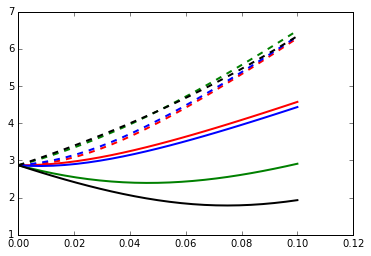

In [20]:
f= []

B_lab = nv.B_cart(B_mag, theta, phi)
for i in range(4):
    

    # get the off axis and on axis field
    BNV = nv.B_fields_in_NV_frame(B_lab, i)
    fo = nv.esr_frequencies(BNV)
    
    plt.plot(B_mag, fo[:,0]*1e-9, NV_colors[i], linewidth=2)
    plt.plot(B_mag, fo[:,1]*1e-9, NV_colors[i]+'--', linewidth=2)
    f.append(fo)

f = np.array(f)


### test recovery of field amplitude from NV family
- some bug here, this should be fixed

In [10]:
errs = np.array([nv_test.test_magnetic_field_mag_ensemble(Bmax=0.1, verbose = False) for i in range(1000)])
np.shape(errs)

(1000L, 4L)

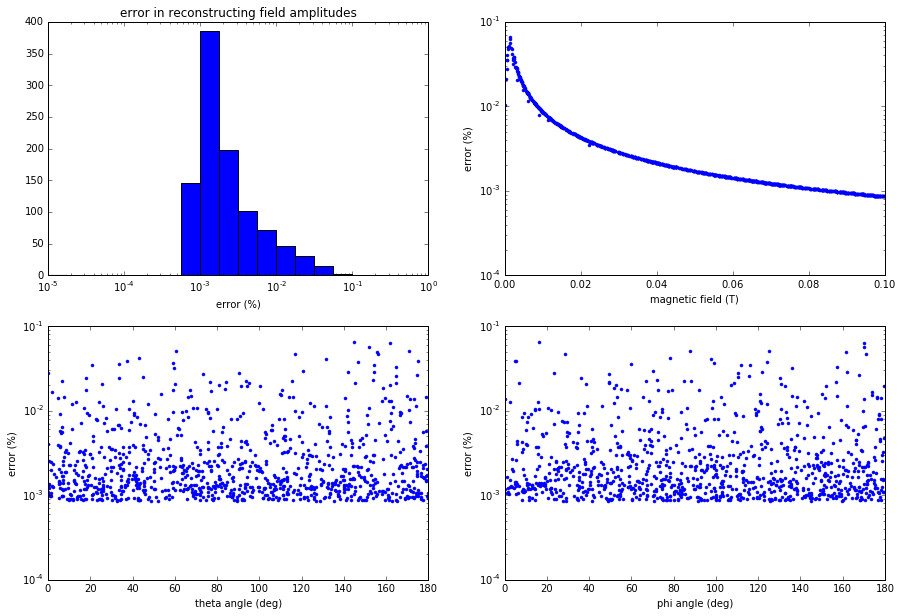

In [11]:

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)

bins=10.**np.arange(-5,0,0.25)
plt.hist(errs[:,0]*100, bins=bins)
plt.gca().set_xscale("log")
plt.title('error in reconstructing field amplitudes')
plt.xlabel('error (%)')

plt.subplot(2, 2, 2)


plt.semilogy(errs[:,1], errs[:,0]*100,'.')
plt.xlabel('magnetic field (T)')
plt.ylabel('error (%)')

plt.subplot(2, 2, 3)

plt.semilogy(errs[:,2], errs[:,0]*100,'.')
plt.xlabel('theta angle (deg)')
plt.ylabel('error (%)')

plt.subplot(2, 2, 4)

plt.semilogy(errs[:,3], errs[:,0]*100,'.')
plt.xlabel('phi angle (deg)')
plt.ylabel('error (%)')

## fit to Hamiltonian

In [2]:
nv_test.test_magnetic_field_fit(Bmax=0.1, verbose = True)

('B, theta, phi', 0.08270552547620753, 52.24280924598615, 172.98062904716417)
('estimated field amplitude', 0.082695172852697049, 0.0)
find the NV with the largest on axis field:
0
('initial guess:', 0.082695172852697049, 54.735610317244998, 135.0)
('err', 0.18878752810991561)
fit result
(' theta_r, phi_r', 52.252167091278125, 172.98036357453546)
======== trying permutations
('B_it_s', (0.082695172852697049, 52.252167091278118, 172.98036357453546))
('fit.x', array([  52.25218896,  172.98039787]))
('fit.fun', 6.1062006197390643e-05)
(' theta_r, phi_r', 52.252167091278125, 172.98036357453546)
---------------------------------------
found better result (perm)
('B_it_s', (0.082695172852697049, 84.454706212792047, 142.04329780395679))
('fit.x', array([  84.45473092,  142.0433253 ]))
('fit.fun', 0.13526829360733633)
(' theta_r, phi_r', 52.252188958418117, 172.98039787152337)
---------------------------------------
('B_it_s', (0.082695172852697049, 52.252167091278118, -82.980363574535474))
('

((6.1033276314107096e-05,
  0.99567954408332204,
  7.0658869110295329e-05,
  1.5693755181143698,
  0.19323703565709885,
  1.2244260784784973),
 0.08270552547620753,
 52.24280924598615,
 172.98062904716417)

#### randomized test:

In [3]:
N = 500
print('estimated duration ({:0.2f} min)'.format(N*0.8/60)) # takes about 0.8 to calculate the field

estimated duration (6.67 min)


In [4]:

start = timer()
errs = np.array([nv_test.test_magnetic_field_fit(
            Bmax=0.1, verbose = False,
            try_permutations_fit = True, try_permutations_xyz = True, try_permutations_sign =True) for i in range(500)])
end = timer()
np.shape(errs)
print('actual duration ({:0.2f} min)'.format((end - start)/60))

Warning the total magnetic field estimated from all families differs by more than 1%!
('relative error', 0.42732930730672258)
('absolute error (Teslas)', 0.00025728361270074444)
Warning the total magnetic field estimated from all families differs by more than 1%!
('relative error', 0.25793235896923983)
('absolute error (Teslas)', 6.2617719508357652e-05)
Warning the total magnetic field estimated from all families differs by more than 1%!
('relative error', 0.044897079371751893)
('absolute error (Teslas)', 0.00011161621505053909)
Warning the total magnetic field estimated from all families differs by more than 1%!
('relative error', 0.61121457140114244)
('absolute error (Teslas)', 0.00022948434101884794)
Warning the total magnetic field estimated from all families differs by more than 1%!
('relative error', 0.24732705271712233)
('absolute error (Teslas)', 6.4667140325522953e-05)
Warning the total magnetic field estimated from all families differs by more than 1%!
('relative error', 0.19

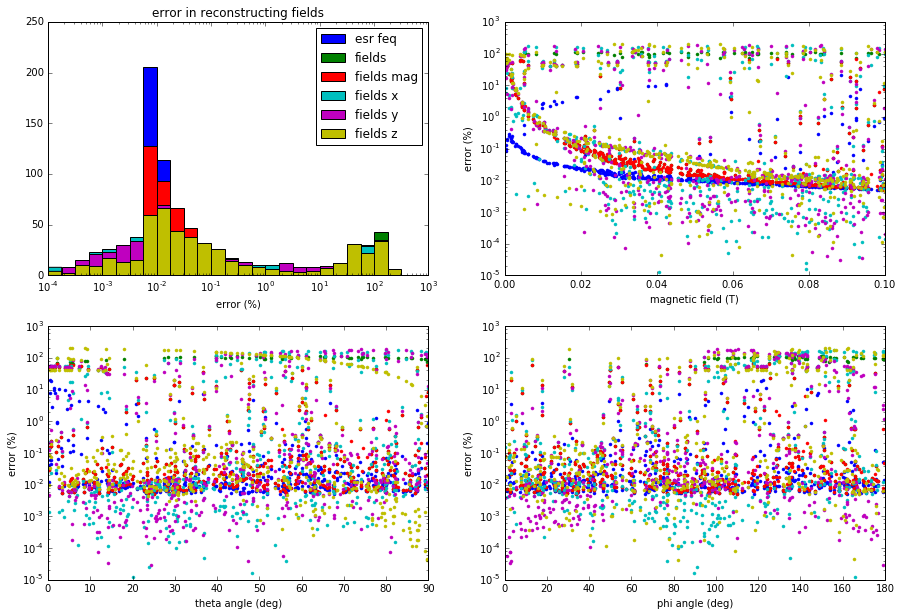

In [5]:

plt.figure(figsize=(15,10))


bins=10.**np.arange(-4,3,0.25)
for e in range(6):
    # there are three types of errors
    # esr freq difference
    # field component differences
    # difference in magnitude of field components
    error = np.array([i[e] for i in np.array(errs[:,0])])*100
    
    plt.subplot(2, 2, 1)
    plt.hist(error, bins=bins, label = ['esr feq', 'fields', 'fields mag', 'fields x', 'fields y', 'fields z'][e])
    plt.subplot(2, 2, 2)
    plt.semilogy(errs[:,1], error,'.')
    plt.subplot(2, 2, 3)
    plt.semilogy(errs[:,2], error,'.')
    plt.subplot(2, 2, 4)
    plt.semilogy(errs[:,3], error,'.')

plt.subplot(2, 2, 1)
plt.gca().set_xscale("log")
plt.title('error in reconstructing fields')
plt.xlabel('error (%)')
plt.legend(loc = 1)

plt.subplot(2, 2, 2)
plt.xlabel('magnetic field (T)')
plt.ylabel('error (%)')

plt.subplot(2, 2, 3)
# plt.plot(errs[:,2], errs[:,0]*100,'.')
plt.xlabel('theta angle (deg)')
plt.ylabel('error (%)')

plt.subplot(2, 2, 4)
# plt.plot(errs[:,3], errs[:,0]*100,'.')
plt.xlabel('phi angle (deg)')
plt.ylabel('error (%)')

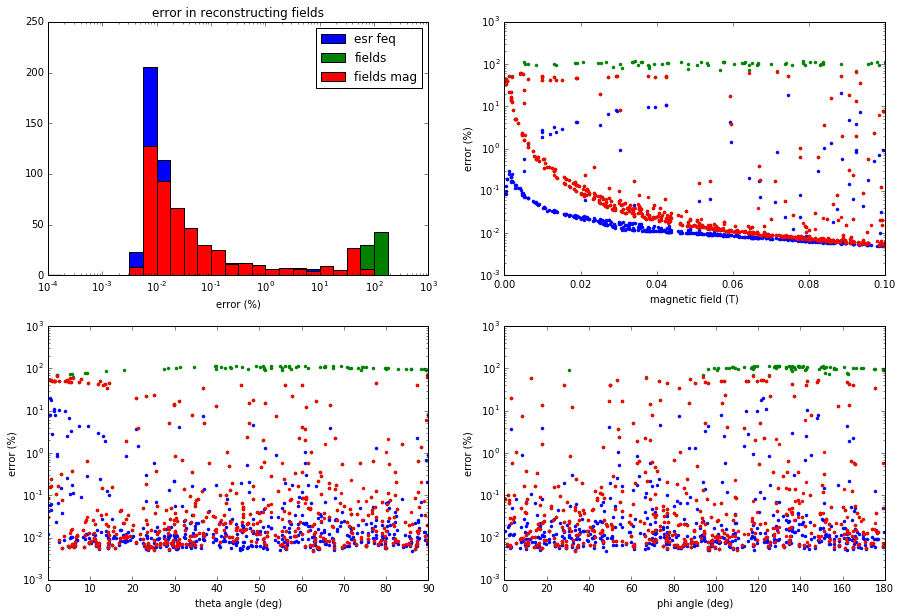

In [6]:

plt.figure(figsize=(15,10))


bins=10.**np.arange(-4,3,0.25)
for e in [0,1,2]:
    # there are three types of errors
    # esr freq difference
    # field component differences
    # difference in magnitude of field components
    error = np.array([i[e] for i in np.array(errs[:,0])])*100
    
    plt.subplot(2, 2, 1)
    plt.hist(error, bins=bins, label = ['esr feq', 'fields', 'fields mag', 'fields x', 'fields y', 'fields z'][e])
    plt.subplot(2, 2, 2)
    plt.semilogy(errs[:,1], error,'.')
    plt.subplot(2, 2, 3)
    plt.semilogy(errs[:,2], error,'.')
    plt.subplot(2, 2, 4)
    plt.semilogy(errs[:,3], error,'.')

plt.subplot(2, 2, 1)
plt.gca().set_xscale("log")
plt.title('error in reconstructing fields')
plt.xlabel('error (%)')
plt.legend(loc = 1)

plt.subplot(2, 2, 2)
plt.xlabel('magnetic field (T)')
plt.ylabel('error (%)')

plt.subplot(2, 2, 3)
# plt.plot(errs[:,2], errs[:,0]*100,'.')
plt.xlabel('theta angle (deg)')
plt.ylabel('error (%)')

plt.subplot(2, 2, 4)
# plt.plot(errs[:,3], errs[:,0]*100,'.')
plt.xlabel('phi angle (deg)')
plt.ylabel('error (%)')

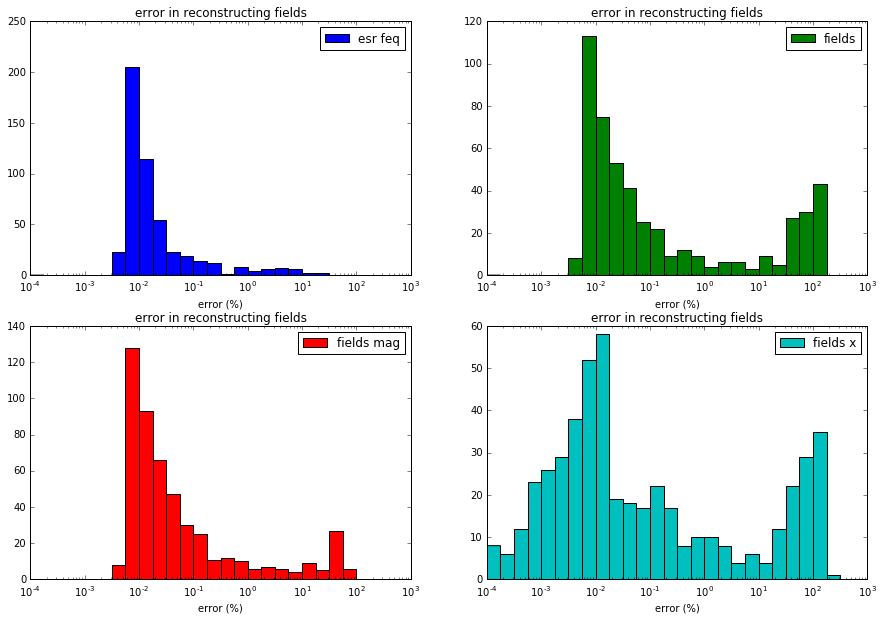

In [11]:

plt.figure(figsize=(15,10))

colors = ['b','g','r','c']
bins=10.**np.arange(-4,3,0.25)
for c, e in enumerate([0,1,2,3]):
    # there are three types of errors
    # esr freq difference
    # field component differences
    # difference in magnitude of field components
    error = np.array([i[e] for i in np.array(errs[:,0])])*100
    
    plt.subplot(2, 2, c+1)
    plt.hist(error,color=colors[c], bins=bins, label = ['esr feq', 'fields', 'fields mag', 'fields x', 'fields y', 'fields z'][c])


    plt.gca().set_xscale("log")
    plt.title('error in reconstructing fields')
    plt.xlabel('error (%)')
    plt.legend(loc = 1)


In [21]:
import itertools


for x in list(itertools.permutations(([1,2,3],[-1,1]))):
     print(x)


([1, 2, 3], [-1, 1])
([-1, 1], [1, 2, 3])


#### now we look in detail at the ones with the biggest error

In [28]:
def plot2D_error_landscape(B_r, theta_r, phi_r, theta_init= None, phi_init = None, N= 50):
    """
    plot the error landscape for a retrieved frequency value
    
    """

    err_r = nv.fit_err_fun([theta_r, phi_r], B_r, freq)

    ts = np.linspace(0,180,N+1)
    ps = np.linspace(-180,180,N)
    err = [[nv.fit_err_fun([t, p], B_r, freq) for t in ts] for p in ps]

    plt.pcolormesh(ts, ps, err)
    if (not theta_init is None) and (not phi_init is None):
        plt.plot(theta_init, phi_init, 'go')
    plt.plot(theta_r, phi_r,  'wo')
#     plt.plot(theta_r-45, phi_r, 'go')
    # plt.plot(phi_init, theta_init+180, 'ko')
    plt.colorbar()
    plt.xlim([0,180])
    plt.ylim([-180,180])
    plt.title('err {:f}'.format(err_r) )
    plt.xlabel('theta (deg)')
    plt.ylabel('phi (deg)')

In [36]:
e = 2 # 1 = fields, 2 = field mag
error = np.array([i[e] for i in np.array(errs[:,0])])*100

('index ', 331, '====================================')
('B, theta, phi ', 0.07009839423198172, 89.30543488577355, 95.66077463369474)
('B_r, theta_r, phi_r ', 0.070086179398966775, 0.0, -70.835452670770394)
('index ', 8, '====================================')
('B, theta, phi ', 0.039658287933843794, 1.285401884933367, 178.42061617345053)
('B_r, theta_r, phi_r ', 0.039636693488300567, 91.270072520987739, -0.025922678785257083)
('index ', 145, '====================================')
('B, theta, phi ', 0.09256300028453214, 0.17989487124480896, 20.044807844130048)
('B_r, theta_r, phi_r ', 0.092553750277966196, 125.26443922090135, -135.00003284039707)
('index ', 436, '====================================')
('B, theta, phi ', 0.09772848873780757, 0.23919454610964896, 18.090655639441124)
('B_r, theta_r, phi_r ', 0.097719727690050412, 125.26445427552557, -135.00004631850459)
('index ', 29, '====================================')
('B, theta, phi ', 0.03305955886940187, 0.4815013771369514, 62.6

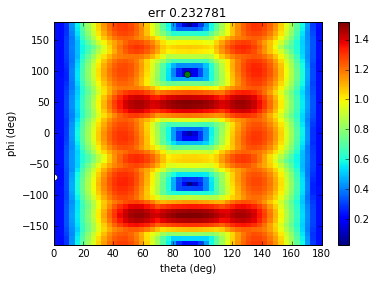

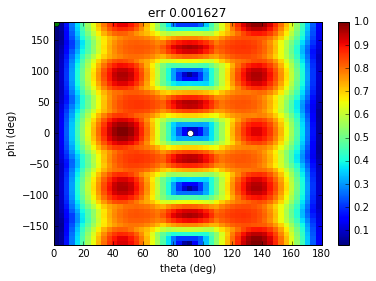

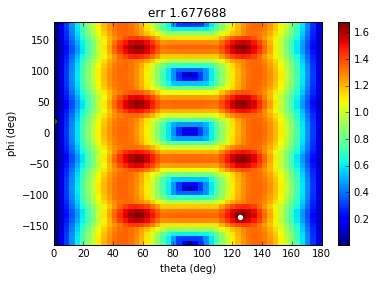

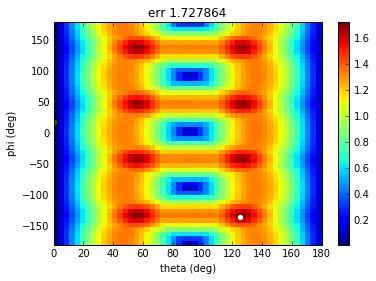

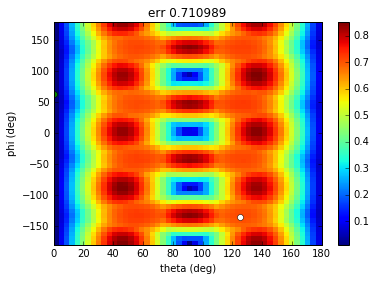

In [37]:
n=5 # the n values with the highest error

for a in np.argsort(-error)[0:n]:
    print('index ', a, '====================================')
    B, theta, phi = errs[a][1:4]
    B_cart = nv.B_cart(B, theta, phi)
    # calculate freq. this is later the measurement value
    freq = nv.esr_frequencies_ensemble(B_cart)
    B_r, theta_r, phi_r = nv.fit_Hamiltonian(freq, verbose = False)
    print('B, theta, phi ', B, theta, phi)
    print('B_r, theta_r, phi_r ', B_r, theta_r, phi_r)
    plt.figure()
    plot2D_error_landscape(B_r, theta_r, phi_r, theta, phi, N= 50)

In [33]:
B, theta, phi = errs[np.argsort(-error)[0:1][0]][1:4]

In [25]:
nv_test.calc_error_ensemble_fit(B, theta, phi, verbose=True)

('B, theta, phi', 0.07009839423198172, 89.30543488577355, 95.66077463369474)
('estimated field amplitude', 0.070086179398966775, 2.7755575615628914e-17)
find the NV with the largest on axis field:
0
('initial guess:', 0.070086179398966775, 54.735610317244998, 135.0)
('err', 1.3052676153823328)
fit result
(' theta_r, phi_r', 73.92334293575702, 133.42232793714282)
======== trying permutations
('B_it_s', (0.070086179398966761, 73.92334293575702, 133.42232793714282))
('fit.x', array([  73.92334294,  133.42232794]))
('fit.fun', 1.0223628911546596)
(' theta_r, phi_r', 73.92334293575702, 133.42232793714282)
---------------------------------------
('B_it_s', (0.070086179398966761, 45.741038043720089, 157.25315799802786))
('fit.x', array([  0.        , -70.83545267]))
('fit.fun', 0.23278091164419523)
(' theta_r, phi_r', 73.92334293575702, 133.42232793714282)
---------------------------------------
found better result (perm)
('B_it_s', (0.070086179398966761, 73.92334293575702, -43.42232793714280

(0.23278091164419601,
 0.69379502096006862,
 0.69379502096006862,
 0.098631252184512339,
 0.9950502145834631,
 0.98770359611223069)

### example code that shows that permutation help with getting lower errors 
*takes about 1s to calculate the field with the most precise approach*
- try_permutations_fit we calculate the fields and the we optimize for all possible 6 permutations of the fields
- try_permutations_xyz we calculate the fields and the we calculate the error for all possible 6 permutations of the fields

In [5]:
B_lab = np.array([ 0.03976179,  0.01455621,  0.00022216])
# get the ESR freq. for the four families
freq_ensemble = nv.esr_frequencies_ensemble(B_lab)

start = timer()
B_r, theta_r, phi_r = nv.fit_Hamiltonian(freq_ensemble, verbose = False, try_permutations_fit=False, try_permutations_xyz=False)
end = timer()
err_esr = nv.fit_err_fun([theta_r, phi_r], B_r, freq_ensemble)
print('error with naive approach', err_esr)
print('duration: ',end - start)
start = timer()
B_r, theta_r, phi_r = nv.fit_Hamiltonian(freq_ensemble, verbose = False, try_permutations_fit=True, try_permutations_xyz=False)
end = timer()
err_esr = nv.fit_err_fun([theta_r, phi_r], B_r, freq_ensemble)
print('error with permutation optimization approach', err_esr)
print('duration: ',end - start)
start = timer()
B_r, theta_r, phi_r = nv.fit_Hamiltonian(freq_ensemble, verbose = False, try_permutations_fit=False, try_permutations_xyz=True)
end = timer()
err_esr = nv.fit_err_fun([theta_r, phi_r], B_r, freq_ensemble)
print('error with xyz permutation approach', err_esr)
print('duration: ',end - start)
start = timer()
B_r, theta_r, phi_r = nv.fit_Hamiltonian(freq_ensemble, verbose = False, try_permutations_fit=True, try_permutations_xyz=True)
end = timer()
err_esr = nv.fit_err_fun([theta_r, phi_r], B_r, freq_ensemble)
print('error with permutation and xyz permutation approach', err_esr)
print('duration: ',end - start)

('error with naive approach', 0.00087045920835532688)
('duration: ', 0.1457851687710411)
('error with permutation optimization approach', 0.00086414592885785345)
('duration: ', 0.7986006657085825)
('error with xyz permutation approach', 0.00087045920835532688)
('duration: ', 0.14821690375780938)
('error with permutation and xyz permutation approach', 0.00086414592885785345)
('duration: ', 0.8030170900620339)


In [ ]:
n=3 # the n values with the highest error

for a in np.argsort(-error)[0:n]:
    print('index ', a, '====================================')
    B, theta, phi = errs[a][1:4]
    B_cart = nv.B_cart(B, theta, phi)
    # calculate freq. this is later the measurement value
    freq = nv.esr_frequencies_ensemble(B_cart)
    B_r, theta_r, phi_r = nv.fit_Hamiltonian(freq, verbose = False)
    print('B, theta, phi ', B, theta, phi)
    print('B_r, theta_r, phi_r ', B_r, theta_r, phi_r)
    plt.figure()
    plot2D_error_landscape(B_r, theta_r, phi_r, N= 50)

('index ', 15, '====================================')
('B, theta, phi ', 0.9572924514437369, 28.007958562173794, 162.70536041409417)
('B_r, theta_r, phi_r ', 0.95729155708175007, 28.007753596855554, 162.70601230400871)
('index ', 40, '====================================')
('B, theta, phi ', 0.9749032798146431, 12.57082941358285, 65.03151603679794)
('B_r, theta_r, phi_r ', 0.97490240160858666, 167.42961302700371, -114.96937414235323)
('index ', 10, '====================================')
('B, theta, phi ', 0.8127336987215233, 14.56599857907792, 132.03127967325162)
('B_r, theta_r, phi_r ', 0.81273264528158928, 14.565591900447041, 132.0321601267236)


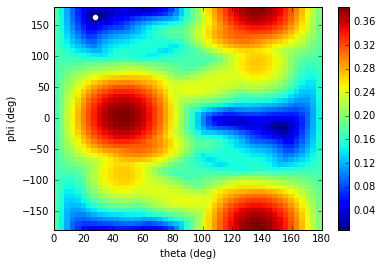

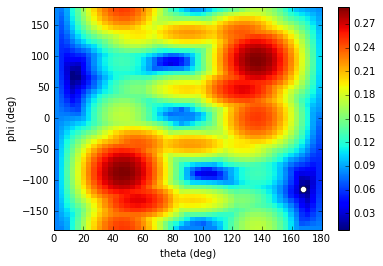

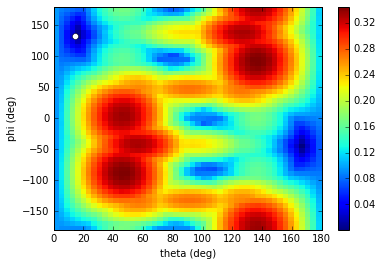

In [7]:
n=3 # the n values with the lowest error

for a in np.argsort(error)[0:n]:
    print('index ', a, '====================================')
    B, theta, phi = errs[a][1:4]
    B_cart = nv.B_cart(B, theta, phi)
    # calculate freq. this is later the measurement value
    freq = nv.esr_frequencies_ensemble(B_cart)
    B_r, theta_r, phi_r = nv.fit_Hamiltonian(freq, verbose = False)
    print('B, theta, phi ', B, theta, phi)
    print('B_r, theta_r, phi_r ', B_r, theta_r, phi_r)
    plt.figure()
    plot2D_error_landscape(B_r, theta_r, phi_r, N= 50)

# old stuff

## plot 1D curve of error
This doesn't work anymore, because we don't have the inital guesses anymore (now we just calculate the inside of fit_Hamiltonian)

In [23]:
N= 50
ts = np.linspace(-180,180,N)
ps = np.linspace(-180,180,N)

plt.plot(ts, [nv.fit_err_fun([t, phi_init], B_mag_init, freq) for t in ts])
plt.plot(ps, [nv.fit_err_fun([theta_init, p], B_mag_init, freq) for p in ps])
plt.plot(theta_init, nv.fit_err_fun([theta_init, phi_init], B_mag_init, freq), 'ro')
plt.plot(phi_init, nv.fit_err_fun([theta_init, phi_init], B_mag_init, freq), 'rx')


plt.plot(ts, [nv.fit_err_fun([t, phi_r], B_mag_init, freq) for t in ts], '--')
plt.plot(ps, [nv.fit_err_fun([theta_r, p], B_mag_init, freq) for p in ps], '--')
plt.plot(theta_r, nv.fit_err_fun([theta_r, phi_r], B_r, freq), 'ko')
plt.plot(phi_r, nv.fit_err_fun([theta_r, phi_r], B_r, freq), 'kx')

plt.xlabel('theta / phi (in deg)')
plt.ylabel('error')

NameError: name 'phi_init' is not defined

## plot a 2D landscape of the error
to get a visual understanding for the quality of the fit

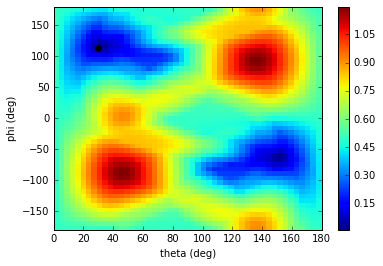

In [25]:
N= 50

ts = np.linspace(0,180,N)
ps = np.linspace(-180,180,N)
err = [[nv.fit_err_fun([t, p], B_r, freq) for t in ts] for p in ps]

plt.pcolormesh(ts, ps, err)
# plt.plot(theta_init, phi_init, 'go')
plt.plot(theta_r, phi_r, 'ko')
# plt.plot(phi_init, theta_init+180, 'ko')
plt.colorbar()
plt.xlim([0,180])
plt.ylim([-180,180])

plt.xlabel('theta (deg)')
plt.ylabel('phi (deg)')



## recover x,y, z components of field

In [2]:
def identify_families(frequencies):
    """
        frequencies: vector of frequencies with length N
        
        return: an array of N/2 x 2 dimensions where each row corresponds to a NV family
        
        !!! WARNING: assume that freqs are ordered, which doesn't have to be the case !!
    
    """
    
    number_of_frequencies = len(frequencies)
    if number_of_frequencies % 2 ==1:
        print('odd number of frequencies, cannot calculate Bfield')


    number_of_families = number_of_frequencies/2
#          
    NV_freq = np.array([sorted(frequencies)[0:number_of_families],  sorted(frequencies)[number_of_families:][::-1]]).T
        
    return NV_freq